In [1]:
%load_ext autoreload
%load_ext autotime

time: 262 µs (started: 2023-12-10 18:47:05 -08:00)


In [2]:
import sys
sys.path.append("../")
import warnings
warnings.filterwarnings('ignore')
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

time: 754 ms (started: 2023-12-10 18:47:05 -08:00)


In [3]:
import dask.dataframe as dd
import numpy as np
import pandas as pd


time: 990 ms (started: 2023-12-10 18:47:06 -08:00)


In [4]:
trace_path = '/usr/workspace/iopp/wisio_logs/recorder_hacc_32_0/_parquet'

time: 710 µs (started: 2023-12-10 18:47:07 -08:00)


In [5]:
%autoreload 2

from wisio.cluster_management import load_cluster_config
from wisio.recorder import RecorderAnalyzer

cluster_config = load_cluster_config('cluster_config_local.yml')
cluster_config.local_dir = '/var/tmp/wisio-recorder-hacc'

analyzer = RecorderAnalyzer(
    checkpoint=True,
    checkpoint_dir='/usr/workspace/iopp/wisio_logs/_checkpoints/recorder_hacc_32_0',
    cluster_config=cluster_config,
    working_dir='.recorder/hacc',
    debug=True,
)

analyzer

[INFO] [18:47:11] Initializing Recorder analyzer [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:88]
[DEBUG] [18:47:11] Using selector: EpollSelector [/collab/usr/gapps/python/build/spack-toss4.1/var/spack/environments/python/._view/75prb56irmif5ejtirjthpx6kq3gqo52/lib/python3.9/asyncio/selector_events.py:54]


time: 3.66 s (started: 2023-12-10 18:47:09 -08:00)


In [6]:
analyzer.cluster_manager.client

<Client: 'tcp://127.0.0.1:35903' processes=8 threads=48>

time: 53.3 ms (started: 2023-12-10 18:47:13 -08:00)


In [8]:
%autoreload 2

res = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
    # view_types=['proc_name'],
)

[INFO] [18:47:37] Read traces (0.4372788965702057) [/g/g91/izzet/projects/wisio/notebooks/../wisio/recorder.py:67]


[INFO] [18:47:42] Compute high-level metrics (5.109245877712965) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:108]
[INFO] [18:47:44] Compute main view (1.6564690135419369) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:121]
[INFO] [18:47:44] Compute metric boundaries (0.019932297058403492) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:134]
[INFO] [18:47:48] Compute views (3.6365114068612456) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:143]
[INFO] [18:47:49] Compute logical views (1.4575828649103642) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:154]
[INFO] [18:47:51] Evaluate I/O accesses (1.9243480898439884) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:169]
[DEBUG] [18:47:51] Create characteristics rules (7.483083754777908e-05) [/g/g91/izzet/projects/wisio/notebooks/../wisio/rule_engine.py:39]
/g/g91/izzet/projects/wisio/notebooks/../wisio/analysis.py:69: SettingWithCopyWarning: 
A value is trying t

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  I/O Time             10.37 seconds                                                                             │
│                       ├── Read - 1.40 seconds (13.48%)                                                          │
│                       ├── Write - 2.98 seconds (28.74%)                                                         │
│                       └── Metadata - 8.80 seconds (84.85%)                                                      │
│  I/O Ops              72,928 ops                                                                                │
│                       ├── Read - 12,800 ops (17.55%)                                                            │
│                       ├── Write - 12,800 ops (17.55%)                                                           │
│                       └── Metadata - 47,328 ops (64.90%)                                                        │
│  I/O Size             8040.00 GB                                                                                │
│                       ├── Read - 790.00 GB (9.83%)                                                              │
│                       └── Write - 790.00 GB (9.83%)                                                             │
│  Read Xfer            64 MB->64 MB - 2,662 ops                                                                  │
│                       ├── 16-64 MB - 1,382 ops (51.92%)                                                         │
│                       └── >64 MB - 1,280 ops (48.08%)                                                           │
│  Write Xfer           64 MB->64 MB - 2,954 ops                                                                  │
│                       ├── 16-64 MB - 1,674 ops (56.67%)                                                         │
│                       └── >64 MB - 1,280 ops (43.33%)                                                           │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 10.37 s (100.00%) - 790.00/790.00 GB R/W (9.83/9.83%) - 72,928 ops        │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 10.37 s (100.00%) - 790.00/790.00 GB R/W (9.83/9.83%) - 72,928 ops (100.00%)   │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                2561 files                                                                                │
│                       ├── Shared: 1 files (0.04%)                                                               │
│                       └── FPP: 2560 files (99.96%)                                                              │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  excessive_metadata_access                                                                                      │
│  ├── file_name                                                                                                  │
│  │   ├── 1 process accesses 1 file within 3 time periods and has an I/O time of 10.37 seconds which is 100.00%  │
│  │   │   of overall I/O time of the workload.                                                                   │
│  │   │   └── Overall 81.50% (8.45 seconds) of I/O time

time: 1min 13s (started: 2023-12-10 18:47:37 -08:00)


In [11]:
%autoreload 2

res = analyzer.analyze_parquet(
    trace_path=trace_path, 
    metrics=['time'],
    view_types=['proc_name'],
)

[INFO] [19:05:56] Read traces (0.14256457146257162) [/g/g91/izzet/projects/wisio/notebooks/../wisio/recorder.py:67]
[INFO] [19:05:56] Compute high-level metrics (0.033422164618968964) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:108]
[INFO] [19:05:56] Compute main view (0.035076593048870564) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:121]
[INFO] [19:05:56] Compute metric boundaries (0.018485010601580143) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:134]
[INFO] [19:05:56] Compute views (0.1703665927052498) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:143]
[INFO] [19:05:57] Compute logical views (0.801465505734086) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:154]
[INFO] [19:05:57] Evaluate I/O accesses (0.36985801439732313) [/g/g91/izzet/projects/wisio/notebooks/../wisio/analyzer.py:169]
[DEBUG] [19:05:57] Create characteristics rules (6.712973117828369e-05) [/g/g91/izzet/projects/wisio/notebooks/../wisio/rule_

╭────────────────────────────────────────────── I/O Characteristics ──────────────────────────────────────────────╮
│  I/O Time             10.37 seconds                                                                             │
│                       ├── Read - 1.40 seconds (13.48%)                                                          │
│                       ├── Write - 2.98 seconds (28.74%)                                                         │
│                       └── Metadata - 8.80 seconds (84.85%)                                                      │
│  I/O Ops              72,928 ops                                                                                │
│                       ├── Read - 12,800 ops (17.55%)                                                            │
│                       ├── Write - 12,800 ops (17.55%)                                                           │
│                       └── Metadata - 47,328 ops (64.90%)                                                        │
│  I/O Size             8040.00 GB                                                                                │
│                       ├── Read - 790.00 GB (9.83%)                                                              │
│                       └── Write - 790.00 GB (9.83%)                                                             │
│  Read Xfer            64 MB->64 MB - 2,662 ops                                                                  │
│                       ├── 16-64 MB - 1,382 ops (51.92%)                                                         │
│                       └── >64 MB - 1,280 ops (48.08%)                                                           │
│  Write Xfer           64 MB->64 MB - 2,954 ops                                                                  │
│                       ├── 16-64 MB - 1,674 ops (56.67%)                                                         │
│                       └── >64 MB - 1,280 ops (43.33%)                                                           │
│  Node(s)              1 node(s)                                                                                 │
│                       └── localhost - 10.37 s (100.00%) - 790.00/790.00 GB R/W (9.83/9.83%) - 72,928 ops        │
│                           (100.00%)                                                                             │
│  App(s)               1 app(s)                                                                                  │
│                       └── app1 - 10.37 s (100.00%) - 790.00/790.00 GB R/W (9.83/9.83%) - 72,928 ops (100.00%)   │
│  Process(es)/Rank(s)  1280 process(es)/rank(s)                                                                  │
│  Files                2561 files                                                                                │
│                       ├── Shared: 1 files (0.04%)                                                               │
│                       └── FPP: 2560 files (99.96%)                                                              │
│  Access Pattern       100.00% Sequential - 0.00% Random                                                         │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯
╭──────────────────────────────────────────────── I/O Bottlenecks ────────────────────────────────────────────────╮
│  excessive_metadata_access (840 bottlenecks)                                                                    │
│  ├── proc_name (419 bottlenecks)                                                                                │
│  │   ├── 1 process accesses 3 files within 4 time periods and has an I/O time of 10.37 seconds which is         │
│  │   │   100.00% of overall I/O time of the workload.                                                           │
│  │   │   └── Overall 81.50% (8.45 seconds) of I/O time

time: 20 s (started: 2023-12-10 19:05:56 -08:00)


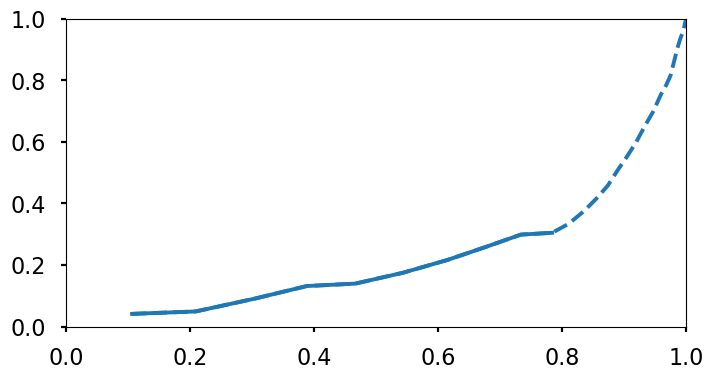

time: 289 ms (started: 2023-09-26 22:05:12 -07:00)


In [9]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
fig, ax = result.plot.slope(
    metric='duration', 
    view_keys=[('time_range',)], #, ('file_name',), ('proc_name',)],
    figsize=(8, 4)
)
# group_view

In [10]:
res.main_view.reset_index().query("file_name == '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-of-00001280.data'").compute()

time_range                                          file_name  \
3966            9  /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-...   
5826           13  /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-...   
9128           21  /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-...   
9645           22  /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-...   
10579          24  /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-...   
11168          25  /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-...   
11589          26  /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-...   
11773          27  /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-...   

                               proc_name  duration_sum  index_count  \
3966   app1#localhost#101#35184372401616      7.991288            1   
5826   app1#localhost#101#35184372401616      0.000029            2   
9128   app1#localhost#101#35184372401616      0.104703           18   
9645   app1#localhost#101#35184372401616      0.002951            3   
10579  app1#localhost#101#35184372401616      0.101497            4   
11168  app1#localhost#101#35184372401616      0.928673           13   
11589  app1#localhost#101#35184372401616      0.104193            6   
11773  app1#localhost#101#35184372401616      0.000042            1   

        size_min   size_max    size_sum  read_time  write_time  ...  \
3966           0          0           0   0.000000    0.000000  ...   
5826           0          0           0   0.000000    0.000000  ...   
9128   150994944  788529152  3347054592   0.000000    0.104657  ...   
9645    25165824   25165824    25165824   0.000000    0.002784  ...   
10579   25165824   25165824    25165824   0.099919    0.000000  ...   
11168  184549376  452984832  1560281088   0.928621    0.000000  ...   
11589  461373440  763363328  1786773504   0.104176    0.000000  ...   
11773          0          0           0   0.000000    0.000000  ...   

       seek_time  stat_time  close_count  open_count  seek_count  stat_count  \
3966    0.000000        0.0            0           1           0           0   
5826    0.000000        0.0            1           1           0           0   
9128    0.000047        0.0            0           0           9           0   
9645    0.000005        0.0            1           0           1           0   
10579   0.000002        0.0            1           1           1           0   
11168   0.000034        0.0            0           1           6           0   
11589   0.000017        0.0            0           0           3           0   
11773   0.000000        0.0            1           0           0           0   

                 bw        iops     intensity                   id  
3966   0.000000e+00    0.000000  0.000000e+00 -4942899263968354275  
5826   0.000000e+00    0.000000  0.000000e+00  6655181920363666252  
9128   7.000194e+13   85.995531  5.683355e-08   954186692758977181  
9645   9.040423e+09  359.234127  3.973643e-08 -7422670447283832389  
10579  2.518623e+08   10.008107  3.973643e-08 -1103296903619652741  
11168  4.863504e+13    6.461191  5.905275e-08  3804046471493980041  
11589  9.022856e+13   28.797448  1.470555e-08  2473218620086027296  
11773  0.000000e+00    0.000000  0.000000e+00 -2317960672912873871  

[8 rows x 44 columns]

time: 112 ms (started: 2023-08-02 19:02:33 -07:00)


In [11]:
dur_proc_ll = res.bottlenecks['duration'][('proc_name',)]['low_level_view'].compute()
dur_proc_ll.query('duration_th >= 0.75')[['duration_sum', 'index_count', 'metadata_time', 'open_time', 'close_time', 'duration_th', 'duration_score']]

duration_sum  \
proc_name                          time_range file_name                                                          
app1#localhost#101#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000101-o...      7.991288   
app1#localhost#104#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000104-o...      7.802004   
app1#localhost#107#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000107-o...      8.442837   
app1#localhost#110#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000110-o...      8.010566   
app1#localhost#112#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000112-o...      8.441751   
app1#localhost#1122#35184372401616 9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00001122-o...      8.026132   
app1#localhost#1123#35184372401616 9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00001123-o...      8.403523   
app1#localhost#118#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000118-o...      8.445277   
app1#localhost#119#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000119-o...      8.438038   
app1#localhost#163#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000163-o...      7.787019   
app1#localhost#164#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000164-o...      8.162868   
app1#localhost#177#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000177-o...      8.134157   
app1#localhost#178#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000178-o...      8.133114   
app1#localhost#179#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000179-o...      8.419761   
app1#localhost#180#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000180-o...      8.135974   
app1#localhost#181#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000181-o...      8.140299   
app1#localhost#182#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000182-o...      8.795384   
app1#localhost#184#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000184-o...      8.138468   
app1#localhost#190#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000190-o...      8.131603   
app1#localhost#198#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000198-o...      8.165265   
app1#localhost#401#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000401-o...      8.246094   
app1#localhost#402#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000402-o...      8.239851   
app1#localhost#404#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000404-o...      8.266835   
app1#localhost#405#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000405-o...      8.250850   
app1#localhost#407#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000407-o...      8.208392   
app1#localhost#408#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000408-o...      8.225257   
app1#localhost#412#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000412-o...      8.230181   
app1#localhost#413#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000413-o...      7.783534   
app1#localhost#419#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000419-o...      8.110802   
app1#localhost#423#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000423-o...      8.276361   
app1#localhost#434#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000434-o...      8.219773   
app1#localhost#435#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000435-o...      8.271403   
app1#localhost#436#35184372401616  10         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000436-o...      8.213405   
app1#localhost#437#35184372401616  9          /p/gpfs1/iopp/temp/hacc_dir/test-Part00000437-o...      8.2813

time: 276 ms (started: 2023-08-02 19:02:33 -07:00)


In [12]:
bw_proc_ll = res.bottlenecks['bw'][('proc_name',)]['low_level_view'].compute()
bw_proc_ll.query('bw_th >= 0.5')[['duration_sum', 'bw', 'data_count', 'data_time',  'metadata_count', 'metadata_time', 'size_sum', 'open_count', 'close_count', 'write_count', 'write_time', 'read_time', 'bw_th', 'bw_score']]

duration_sum  \
proc_name                          time_range file_name                                                          
app1#localhost#1000#35184372401616 18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001000-o...      0.992702   
app1#localhost#1017#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001017-o...      0.378509   
app1#localhost#1021#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001021-o...      1.263850   
app1#localhost#1027#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001027-o...      0.210181   
app1#localhost#1029#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001029-o...      0.299973   
...                                                                                                        ...   
app1#localhost#844#35184372401616  19         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000844-o...      0.256569   
app1#localhost#861#35184372401616  21         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000861-o...      0.217642   
app1#localhost#876#35184372401616  18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000876-o...      0.880323   
app1#localhost#904#35184372401616  18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000904-o...      0.215598   
app1#localhost#985#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000985-o...      1.416659   

                                                                                                            bw  \
proc_name                          time_range file_name                                                          
app1#localhost#1000#35184372401616 18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001000-o...  2.535084e+07   
app1#localhost#1017#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001017-o...  6.648673e+07   
app1#localhost#1021#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001021-o...  2.654938e+07   
app1#localhost#1027#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001027-o...  1.197342e+08   
app1#localhost#1029#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001029-o...  8.389360e+07   
...                                                                                                        ...   
app1#localhost#844#35184372401616  19         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000844-o...  9.808595e+07   
app1#localhost#861#35184372401616  21         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000861-o...  1.156293e+08   
app1#localhost#876#35184372401616  18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000876-o...  2.858703e+07   
app1#localhost#904#35184372401616  18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000904-o...  1.167258e+08   
app1#localhost#985#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000985-o...  4.737123e+07   

                                                                                                  data_count  \
proc_name                          time_range file_name                                                        
app1#localhost#1000#35184372401616 18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001000-o...           1   
app1#localhost#1017#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001017-o...           1   
app1#localhost#1021#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001021-o...           1   
app1#localhost#1027#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001027-o...           1   
app1#localhost#1029#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001029-o...           1   
...                                                                                                      ...   
app1#localhost#844#35184372401616  19         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000844-o...           1   
app1#localhost#861#35184372401616  21         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000861-o...           1   
app1#localho

time: 261 ms (started: 2023-08-02 19:02:33 -07:00)


In [13]:
iops_proc_ll = res.bottlenecks['iops'][('proc_name',)]['low_level_view'].compute()
iops_proc_ll.query('iops_th >= 0.5')[['duration_sum', 'iops', 'data_count', 'size_sum', 'metadata_count', 'open_count', 'open_time', 'close_count', 'close_time', 'seek_count', 'write_count', 'write_time', 'stat_time', 'iops_score']]

duration_sum  \
proc_name                          time_range file_name                                                          
app1#localhost#1000#35184372401616 18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001000-o...      0.992702   
app1#localhost#1021#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001021-o...      1.263850   
app1#localhost#1035#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001035-o...      1.148720   
app1#localhost#1049#35184372401616 13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001049-o...      0.982155   
app1#localhost#1057#35184372401616 13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001057-o...      0.886319   
...                                                                                                        ...   
app1#localhost#980#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000980-o...      1.429704   
app1#localhost#981#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000981-o...      1.520542   
app1#localhost#984#35184372401616  13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000984-o...      0.564397   
app1#localhost#985#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000985-o...      1.416659   
app1#localhost#998#35184372401616  13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000998-o...      0.982803   

                                                                                                      iops  \
proc_name                          time_range file_name                                                      
app1#localhost#1000#35184372401616 18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001000-o...  1.007352   
app1#localhost#1021#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001021-o...  0.791233   
app1#localhost#1035#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001035-o...  0.870534   
app1#localhost#1049#35184372401616 13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001049-o...  1.018169   
app1#localhost#1057#35184372401616 13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001057-o...  1.128262   
...                                                                                                    ...   
app1#localhost#980#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000980-o...  2.098337   
app1#localhost#981#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000981-o...  0.657660   
app1#localhost#984#35184372401616  13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000984-o...  1.771802   
app1#localhost#985#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000985-o...  0.705886   
app1#localhost#998#35184372401616  13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000998-o...  2.034996   

                                                                                                  data_count  \
proc_name                          time_range file_name                                                        
app1#localhost#1000#35184372401616 18         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001000-o...           1   
app1#localhost#1021#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001021-o...           1   
app1#localhost#1035#35184372401616 17         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001035-o...           1   
app1#localhost#1049#35184372401616 13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001049-o...           1   
app1#localhost#1057#35184372401616 13         /p/gpfs1/iopp/temp/hacc_dir/test-Part00001057-o...           1   
...                                                                                                      ...   
app1#localhost#980#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000980-o...           3   
app1#localhost#981#35184372401616  14         /p/gpfs1/iopp/temp/hacc_dir/test-Part00000981-o...           1   
app1#localhost#984#35184372401616  13         /p/gpfs1/iopp/temp

time: 254 ms (started: 2023-08-02 19:02:34 -07:00)


In [14]:
25165824 / 1024 / 1024

24.0

time: 2.42 ms (started: 2023-08-02 19:02:34 -07:00)


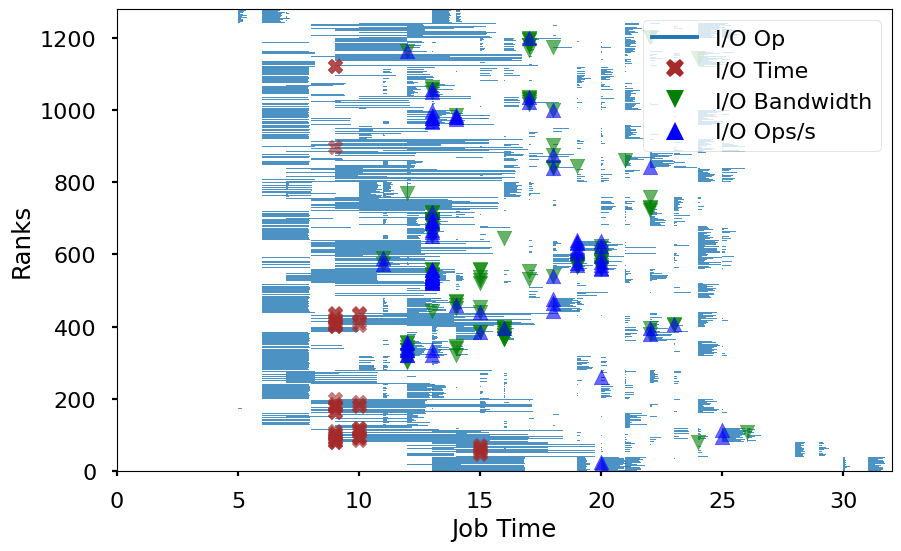

time: 10.9 s (started: 2023-08-02 19:31:48 -07:00)


In [50]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')
# plt.figure(figsize=(8, 4))

fig, ax, bar_data, scatter_data = res.plot.bottleneck_bar(
    figsize=(10, 6),
    metrics=['duration', 'bw', 'iops'],
    labels=['I/O Time', 'I/O Bandwidth', 'I/O Ops/s'],
    thresholds=[0.75, 0.5, 0.5],
    markers=['X', 'v', '^'],
    colors=['brown', 'green', 'blue'],
    marker_size=108,
)


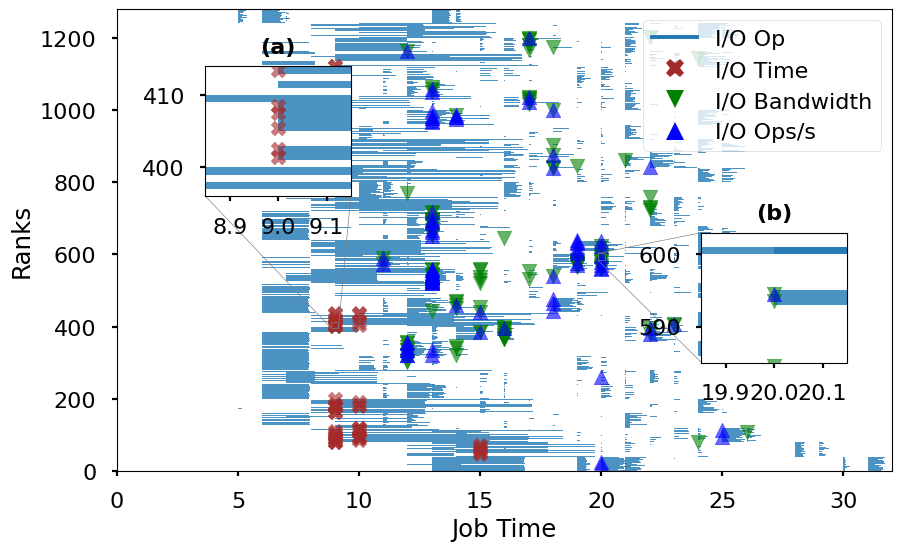

time: 15.6 s (started: 2023-08-02 19:32:00 -07:00)


In [51]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

def mark_zoom(ax, zoom, bbox_to_anchor, xlim, ylim, loc1, loc2, note):
    axins = zoomed_inset_axes(ax, zoom, loc='upper left', bbox_to_anchor=bbox_to_anchor, bbox_transform=ax.transAxes)

    for b in bar_data:
        axins.broken_barh(**b)

    for metric, s0 in scatter_data.items():
        for s in s0:
            axins.scatter(**s)

    axins.set_xlim(xlim)
    axins.set_ylim(ylim)

    mark_inset(ax, axins, loc1=loc1, loc2=loc2, fc="none", ec="0.5")

    axins.annotate(note, xy=(0.5, 1.15), xycoords='axes fraction',
                ha='center', va='center', fontsize=16, weight='bold')

mark_zoom(
    ax=ax,
    zoom=20,
    bbox_to_anchor=(0.1, 0.6, .3, .3),
    xlim=(8.85, 9.15),
    ylim=(396, 414),
    loc1=3,
    loc2=4,
    note='(a)'
)

mark_zoom(
    ax=ax,
    zoom=20,
    bbox_to_anchor=(0.74, 0.24, .3, .3),
    xlim=(19.85, 20.15),
    ylim=(585, 603),
    loc1=2,
    loc2=3,
    note='(b)'
)

fig

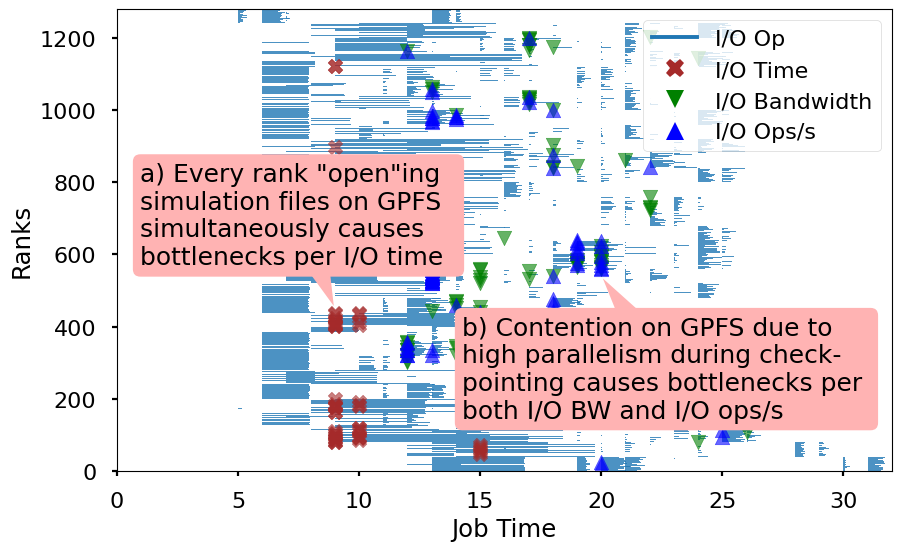

time: 1.31 s (started: 2023-08-01 22:27:20 -07:00)


In [92]:
import matplotlib

for child in fig.gca().get_children():
    if isinstance(child, matplotlib.text.Annotation):
        child.remove()

ax.annotate('''a) Every rank "open"ing  
simulation files on GPFS 
simultaneously causes 
bottlenecks per I/O time''',
    xy=(9, 450), 
    xytext=(-140, 32),
    arrowprops=dict(
        arrowstyle="wedge,tail_width=2.",
        fc=(1.0, 0.7, 0.7), 
        ec="none",
        patchA=None
    ),
    bbox=dict(
        boxstyle="round", 
        fc=(1.0, 0.7, 0.7), 
        ec="none"
    ),
    # color='white',
    size=18,
    textcoords='offset points',
)

ax.annotate('''b) Contention on GPFS due to 
high parallelism during check-
pointing causes bottlenecks per 
both I/O BW and I/O ops/s''',
    xy=(20, 540), 
    xytext=(-100, -102),
    arrowprops=dict(
        arrowstyle="wedge,tail_width=2.",
        fc=(1.0, 0.7, 0.7), 
        ec="none",
        patchA=None,
    ),
    bbox=dict(
        boxstyle="round", 
        fc=(1.0, 0.7, 0.7), 
        ec="none"
    ),
    # color='white',
    # va='bottom',
    size=18,
    textcoords='offset points',
)

fig

In [52]:
fig.savefig('hacc.pdf', bbox_inches='tight')

time: 8.26 s (started: 2023-08-02 19:32:27 -07:00)


(<Figure size 500x500 with 1 Axes>, <Axes: >)

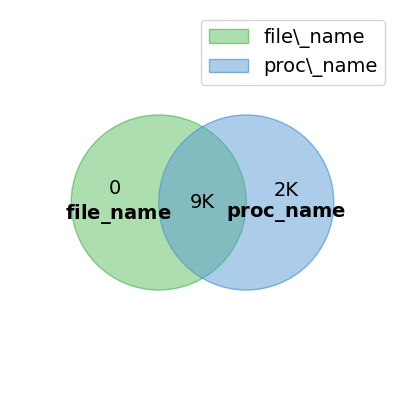

time: 666 ms (started: 2023-07-30 08:31:19 -07:00)


In [7]:
res.plot.view_relations2('duration', ('file_name',), ('proc_name',))

(<Figure size 500x500 with 1 Axes>, <Axes: >)

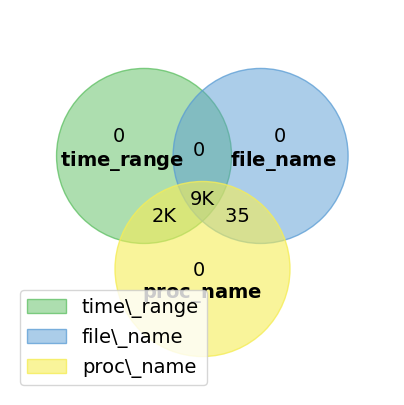

time: 711 ms (started: 2023-07-30 08:31:19 -07:00)


In [8]:
res.plot.view_relations3('duration', ('time_range',), ('file_name',), ('proc_name',))

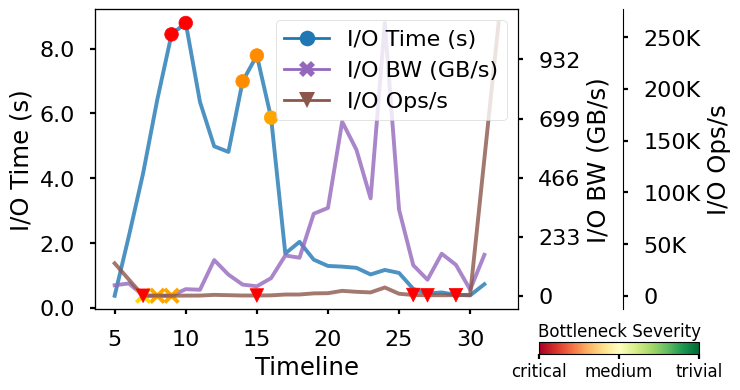

time: 2.15 s (started: 2023-07-30 08:38:03 -07:00)


In [11]:
fig = res.plot.bottleneck_timeline3(
    metric1='duration', 
    metric2='bw', 
    metric3='iops', 
    label1='I/O Time (s)',
    label2='I/O BW (GB/s)',
    label3='I/O Ops/s',
    figsize=(8, 4),
    threshold=0.1,
    sample_count=5,    
)

In [12]:
fig.savefig('hacc.pdf', bbox_inches='tight')

time: 754 ms (started: 2023-07-30 09:19:23 -07:00)


In [7]:
main_view, views, bottlenecks = res

time: 680 µs (started: 2023-03-29 22:46:14 -07:00)


In [8]:
from wisio.rules import Rule
from wisio._recorder.rules import RecorderRuleEngine

rules = dict(
    file_name=[Rule.BOTT_METADATA_ACCESS, Rule.BOTT_SMALL_READS, Rule.BOTT_SMALL_WRITES],
    proc_name=[Rule.BOTT_METADATA_ACCESS],
    trange=[],
)

rule_engine = RecorderRuleEngine(rules=rules)

rule_engine


time: 12.1 ms (started: 2023-03-29 22:46:14 -07:00)


In [9]:
%autoreload 2

characteristics = rule_engine.process_characteristics(view=main_view)
characteristics


{<Rule.CHAR_IO_TIME: 118>: RuleResult(data_dict=None, description='I/O Time', detail_list=None, reasons=None, rule=<Rule.CHAR_IO_TIME: 118>, value=10.367437948642419, value_fmt='10.37 seconds'),
 <Rule.CHAR_IO_SIZE: 116>: RuleResult(data_dict=None, description='Total Size', detail_list=None, reasons=None, rule=<Rule.CHAR_IO_SIZE: 116>, value=8632884264960, value_fmt='8040.00 GB'),
 <Rule.CHAR_READ_IO_SIZE: 125>: RuleResult(data_dict=None, description='Read Size', detail_list=None, reasons=None, rule=<Rule.CHAR_READ_IO_SIZE: 125>, value=848256040960, value_fmt='790.00 GB (9.83%)'),
 <Rule.CHAR_WRITE_IO_SIZE: 130>: RuleResult(data_dict=None, description='Write Size', detail_list=None, reasons=None, rule=<Rule.CHAR_WRITE_IO_SIZE: 130>, value=848256040960, value_fmt='790.00 GB (9.83%)'),
 <Rule.CHAR_READ_XFER_SIZE: 132>: RuleResult(data_dict=None, description='Read Xfer', detail_list=['16-64 MB - 1,382 ops (51.92%)', '>64 MB - 1,280 ops (48.08%)'], reasons=None, rule=<Rule.CHAR_READ_XFER_S

time: 241 ms (started: 2023-03-29 22:46:15 -07:00)


In [10]:
from rich.console import Console
from rich.panel import Panel
from rich.table import Table
from rich.tree import Tree

# Create a new Table object from Rich library
table = Table(box=None, show_header=False)

# Add columns to the table for the key and value
table.add_column(style="cyan")
table.add_column()

# Add each key-value pair to the table as a row
for rule, result in characteristics.items():
    if result.detail_list is None:
        table.add_row(result.description, result.value_fmt)
    else:
        detail_tree = Tree(result.value_fmt)
        for detail in result.detail_list:
            detail_tree.add(detail)
        table.add_row(result.description, detail_tree)

# Create a Console object from Rich library
console = Console()

# Print the table with Rich formatting
console.print(Panel(table, title='Summary'))


╭──────────────────────────────────────────────────── Summary ────────────────────────────────────────────────────╮
│  I/O Time          10.37 seconds                                                                                │
│  Total Size        8040.00 GB                                                                                   │
│  Read Size         790.00 GB (9.83%)                                                                            │
│  Write Size        790.00 GB (9.83%)                                                                            │
│  Read Xfer         64 MB->64 MB - 2,662 ops                                                                     │
│                    ├── 16-64 MB - 1,382 ops (51.92%)                                                            │
│                    └── >64 MB - 1,280 ops (48.08%)                                                              │
│  Write Xfer        64 MB->64 MB - 2,954 ops                                                                     │
│                    ├── 16-64 MB - 1,674 ops (56.67%)                                                            │
│                    └── >64 MB - 1,280 ops (43.33%)                                                              │
│  Total I/O Ops     72,928 ops                                                                                   │
│  Read I/O Ops      12,800 ops (17.55%)                                                                          │
│  Write I/O Ops     12,800 ops (17.55%)                                                                          │
│  Metadata I/O Ops  47,328 ops (64.90%)                                                                          │
│  Apps              1 apps                                                                                       │
│                    └── app1 - 10.37 s (100.00%) - 790.00/790.00 GB R/W (9.83/9.83%) - 72,928 ops (100.00%)      │
│  Nodes             1 nodes                                                                                      │
│                    └── localhost - 10.37 s (100.00%) - 790.00/790.00 GB R/W (9.83/9.83%) - 72,928 ops           │
│                        (100.00%)                                                                                │
│  File Count        2561 files                                                                                   │
│  Shared/FPP        2561 Shared (100.00%) - 0 FPP (0.00%)                                                        │
│  Access Pattern    100.00% Sequential - 0.00% Random                                                            │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

time: 151 ms (started: 2023-03-29 22:46:19 -07:00)


In [14]:
processed_bottlenecks = rule_engine.process_bottlenecks(bottlenecks=bottlenecks, characteristics=characteristics, threshold=0.5)
processed_bottlenecks

{('file_name',): {<Rule.BOTT_METADATA_ACCESS: 207>: {'/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-of-00001280.data': RuleResult(data_dict={'llc': {'duration_sum': 6.4871999524928015, 'index_count': 48, 'size_min': 0, 'size_max': 763363328, 'size_sum': 6744440832, 'read_time': 0.7544080056250095, 'write_time': 1.8765517708379775, 'metadata_time': 3.8562401760298144, 'read_size': 662700032, 'write_size': 662700032, 'metadata_size': 5419040768, 'read_count': 10, 'write_count': 10, 'metadata_count': 28, 'read_min': 58720256, 'read_max': 201326592, 'write_min': 192937984, 'write_max': 260046848, 'metadata_min': 1493172224, 'metadata_max': 2390753280, 'data_count': 20, 'data_size': 1325400064, 'data_time': 2.630959776462987, 'sequential_time': 2.630959776462987, 'random_time': 0.0, 'sequential_size': 1325400064, 'random_size': 0, 'sequential_count': 20, 'random_count': 0, 'close_time': 0.00041419998660785495, 'open_time': 3.855711876044552, 'seek_time': 0.0001140999986546376, 'stat_time': 

time: 19.8 s (started: 2023-03-29 22:56:07 -07:00)


In [13]:
from rich.tree import Tree
from rich.console import Console

# create a tree object
tree = Tree("Bottlenecks")

for view_key, bottleneck_dict in processed_bottlenecks.items():
    branch_name = '_'.join(view_key) if isinstance(view_key, tuple) else view_key
    branch = tree.add(branch_name)
    for rule, rule_results in bottleneck_dict.items():
        subbranch = branch.add(rule.name)
        for bottleneck_key, result in rule_results.items():
            subbranch.add(result.description)


# create a console object and print the tree
console = Console()
console.print(tree)


Bottlenecks
├── file_name
│   └── BOTT_METADATA_ACCESS
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000000-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 59.44% (3.86 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000001-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 60.51% (3.84 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000002-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 58.83% (3.84 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000003-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 60.31% (3.84 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000004-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 59.63% (3.85 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000005-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 58.54% (3.84 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000006-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 58.82% (3.86 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000007-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 59.67% (3.85 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000008-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 58.30% (3.84 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000009-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 58.71% (3.85 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000010-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 60.36% (3.82 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000011-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-31th second(s) and spent 60.69% (3.81 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000012-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 59.78% (3.82 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000013-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 60.00% (3.84 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test-Part00000014-of-00001280.data' is accessed by 1 process(es) during 
│       │   the 13, 15, 19-21, 23, and 30-32th second(s) and spent 59.73% (3.86 seconds) of its I/O time on the 
│       │   'open' operation(s).
│       ├── '/p/gpfs1/iopp/temp/hacc_dir/test

time: 783 ms (started: 2023-03-23 09:57:09 -07:00)


In [8]:
!rm -rf {log_dir}/bottlenecks

time: 394 ms (started: 2023-03-12 17:34:12 -07:00)


In [9]:
recorder_analyzer.save_bottlenecks(log_dir=log_dir, bottlenecks=bottlenecks)


time: 1min 29s (started: 2023-03-12 17:34:12 -07:00)


In [10]:
!chmod g+r {log_dir}/bottlenecks/*
!ls -lh {log_dir}/bottlenecks

total 313M
-rw-r--r-- 1 izzet iopp 18M Mar 12 17:34 file_name.json
-rw-r--r-- 1 izzet iopp 25M Mar 12 17:34 file_name_proc_name.json
-rw-r--r-- 1 izzet iopp 21M Mar 12 17:35 file_name_proc_name_trange.json
-rw-r--r-- 1 izzet iopp 21M Mar 12 17:34 file_name_trange.json
-rw-r--r-- 1 izzet iopp 25M Mar 12 17:35 file_name_trange_proc_name.json
-rw-r--r-- 1 izzet iopp 25M Mar 12 17:34 proc_name.json
-rw-r--r-- 1 izzet iopp 18M Mar 12 17:35 proc_name_file_name.json
-rw-r--r-- 1 izzet iopp 21M Mar 12 17:35 proc_name_file_name_trange.json
-rw-r--r-- 1 izzet iopp 21M Mar 12 17:35 proc_name_trange.json
-rw-r--r-- 1 izzet iopp 18M Mar 12 17:35 proc_name_trange_file_name.json
-rw-r--r-- 1 izzet iopp 21M Mar 12 17:34 trange.json
-rw-r--r-- 1 izzet iopp 18M Mar 12 17:34 trange_file_name.json
-rw-r--r-- 1 izzet iopp 25M Mar 12 17:35 trange_file_name_proc_name.json
-rw-r--r-- 1 izzet iopp 25M Mar 12 17:34 trange_proc_name.json
-rw-r--r-- 1 izzet iopp 18M Mar 12 17:35 trange_proc_name_file_name.json
ti